<a href="https://www.kaggle.com/code/katemmm/cleaning-dirty-data?scriptVersionId=223748035" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

# 1. Dataframe review

In [2]:
sales = pd.read_csv('/kaggle/input/cleaning-data-project/dirty_cafe_sales.csv')
display(sales.head(), sales.info(), sales.describe(include=object))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


None

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_1961373,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


**Problems:**

**Missing values** across all dataframe except Transaction ID. Different types of missing values (NaN, UNKNOWN, ERROR). They should be filled, replaced or dropped.

**Dtype:**
  - Quantity is an object => int
  - Price Per Unit => float
  - Total Spent is an object => float
  - Transaction Date is an object => pd.to_datetime

# 2. Cleaning
## 2.1. Missing Values

## 2.1.1. Identify unique categories across the DataFrame to determine which values are missing (e.g., NaN, UNKNOWN, ERROR) and their quantities.

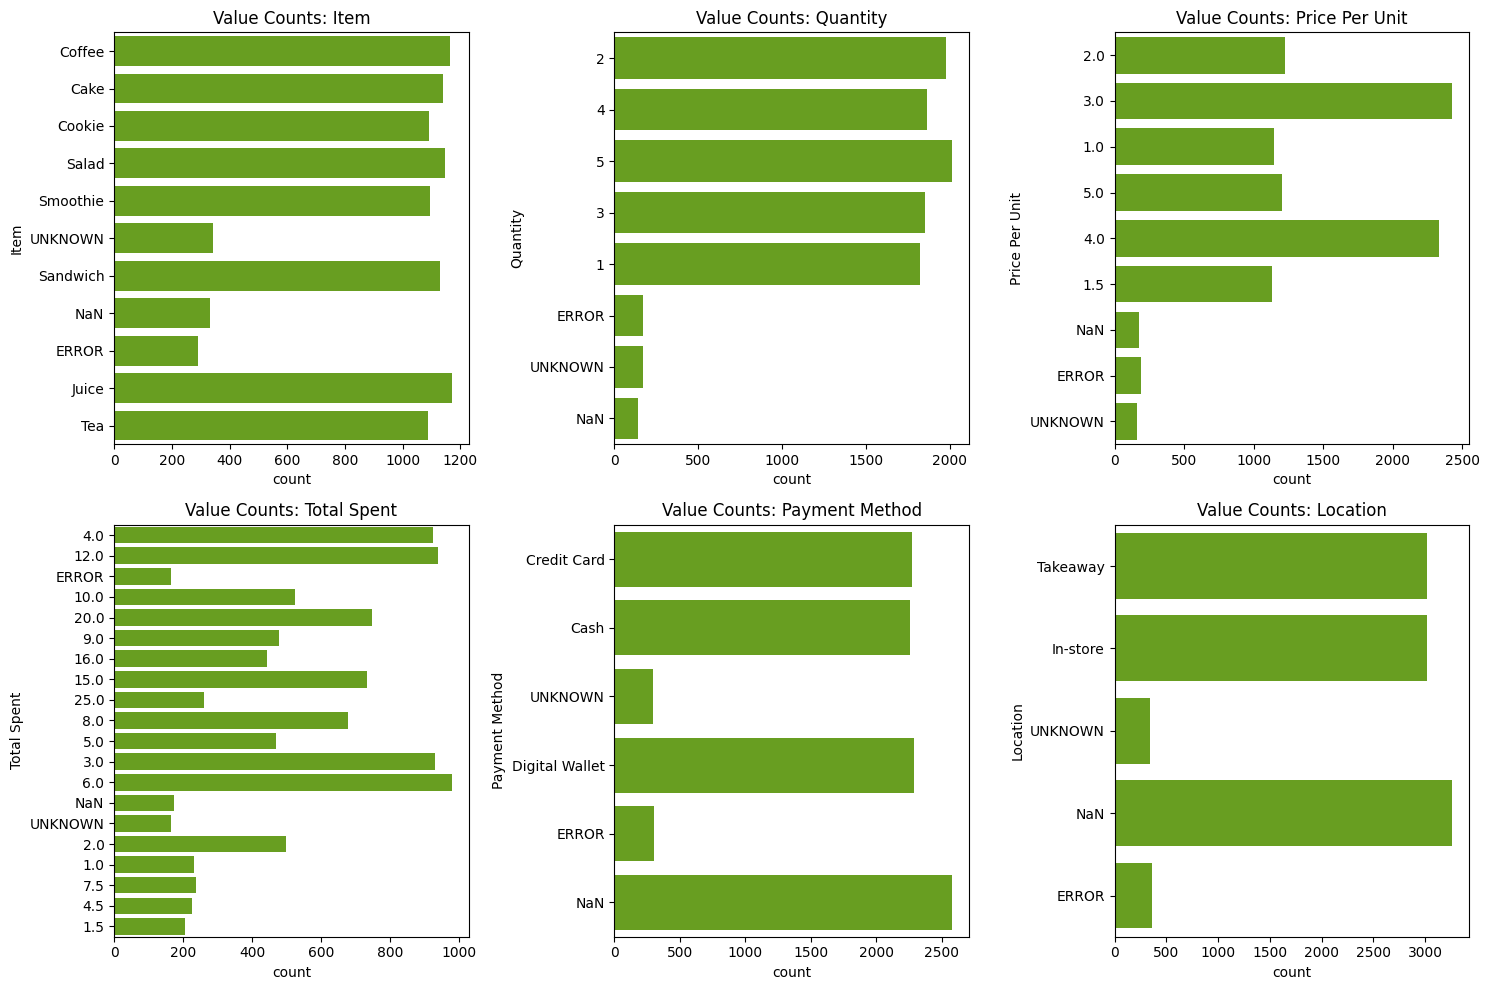

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  
axes = axes.flatten() 

for i, col in enumerate(sales.columns[1:7]):  
    sales_copy = sales[col].fillna("NaN")  # Convert NaNs to "Missing" category
    sns.countplot(y=sales_copy, ax=axes[i], color='#6bb30c')  
    axes[i].set_title(f"Value Counts: {col}")

plt.tight_layout()
plt.show()

In [4]:
to_display = [sales[c].value_counts(normalize=True, dropna=False) * 100 for c in sales.columns]

# Display the value counts for each column
display(*to_display)

Transaction ID
TXN_1961373    0.01
TXN_4831525    0.01
TXN_1228927    0.01
TXN_6486912    0.01
TXN_3447069    0.01
               ... 
TXN_5680238    0.01
TXN_7766134    0.01
TXN_2617257    0.01
TXN_8993132    0.01
TXN_6170729    0.01
Name: proportion, Length: 10000, dtype: float64

Item
Juice       11.71
Coffee      11.65
Salad       11.48
Cake        11.39
Sandwich    11.31
Smoothie    10.96
Cookie      10.92
Tea         10.89
UNKNOWN      3.44
NaN          3.33
ERROR        2.92
Name: proportion, dtype: float64

Quantity
5          20.13
2          19.74
4          18.63
3          18.49
1          18.22
UNKNOWN     1.71
ERROR       1.70
NaN         1.38
Name: proportion, dtype: float64

Price Per Unit
3.0        24.29
4.0        23.31
2.0        12.27
5.0        12.04
1.0        11.43
1.5        11.33
ERROR       1.90
NaN         1.79
UNKNOWN     1.64
Name: proportion, dtype: float64

Total Spent
6.0        9.79
12.0       9.39
3.0        9.30
4.0        9.23
20.0       7.46
15.0       7.34
8.0        6.77
10.0       5.24
2.0        4.97
9.0        4.79
5.0        4.68
16.0       4.44
25.0       2.59
7.5        2.37
1.0        2.32
4.5        2.25
1.5        2.05
NaN        1.73
UNKNOWN    1.65
ERROR      1.64
Name: proportion, dtype: float64

Payment Method
NaN               25.79
Digital Wallet    22.91
Credit Card       22.73
Cash              22.58
ERROR              3.06
UNKNOWN            2.93
Name: proportion, dtype: float64

Location
NaN         32.65
Takeaway    30.22
In-store    30.17
ERROR        3.58
UNKNOWN      3.38
Name: proportion, dtype: float64

Transaction Date
UNKNOWN       1.59
NaN           1.59
ERROR         1.42
2023-06-16    0.40
2023-02-06    0.40
              ... 
2023-04-27    0.15
2023-09-24    0.15
2023-07-22    0.14
2023-03-11    0.14
2023-02-17    0.14
Name: proportion, Length: 368, dtype: float64

## 2.1.2. Handling Missing Data in Sales Transactions.
In real-world datasets, handling NaN, ERROR, and UNKNOWN values depends on:

Missing Data Percentage: Small (<10%) → Impute; Large → Investigate causes. \
Data Type: Numeric → Median/mean; Categorical → Mode or distribution-based filling.

**Investigation Approach for training purposes:**
 - after reverting UNKNOWN and ERROR to NaN ~10% missing values in Item → This is significant enough to justify improving precision and investigation. 
 - Visible patterns in missing the data → Investigate and fix: Price Per Unit, Total Spent, Price Per Unit, Quantity
 - Distribution-based imputation → Ensures that missing Item values match real-world sales trends rather than being randomly assigned. In real-world scenario could be imputated 

In [5]:
# List of columns to convert to numeric
columns_to_convert = ['Quantity', 'Price Per Unit', 'Total Spent']

# Convert the specified columns to numeric, invalid values will be converted to NaN
sales[columns_to_convert] = sales[columns_to_convert].apply(pd.to_numeric, errors='coerce')


# Filling missing data based on data in other columns

#Define valid prices for mapping item names
valid_prices = {
    'Cake': 3.0,
    'Coffee': 2.0,
    'Cookie': 1.0,
    'Juice': 3.0,
    'Salad': 5.0,
    'Sandwich': 4.0,
    'Smoothie': 4.0,
    'Tea': 1.5,
}

# Use 'Price Per Unit' to fill missing values in 'Item' based on valid prices
sales['Price Per Unit'] = sales['Price Per Unit'].fillna(sales['Item'].map(valid_prices))

sales['Total Spent'] = sales['Total Spent'].fillna(sales['Quantity'] * sales['Price Per Unit'])
sales['Price Per Unit'] = sales['Price Per Unit'].fillna(sales['Total Spent']/sales['Quantity'])
sales['Quantity'] = sales['Quantity'].fillna(sales['Total Spent']/sales['Price Per Unit'])
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  object 
 1   Item              9667 non-null   object 
 2   Quantity          9977 non-null   float64
 3   Price Per Unit    9994 non-null   float64
 4   Total Spent       9977 non-null   float64
 5   Payment Method    7421 non-null   object 
 6   Location          6735 non-null   object 
 7   Transaction Date  9841 non-null   object 
dtypes: float64(3), object(5)
memory usage: 625.1+ KB


In [6]:
sales[sales.Quantity.isna()]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
236,TXN_8562645,Salad,NaN,5.0,NaN,NaN,In-store,2023-05-18
278,TXN_3229409,Juice,NaN,3.0,NaN,Cash,Takeaway,2023-04-15
641,TXN_2962976,Juice,NaN,3.0,NaN,NaN,NaN,2023-03-17
738,TXN_8696094,Sandwich,NaN,4.0,NaN,NaN,Takeaway,2023-05-14
2796,TXN_9188692,Cake,NaN,3.0,NaN,Credit Card,NaN,2023-12-01
3203,TXN_4565754,Smoothie,NaN,4.0,NaN,Digital Wallet,Takeaway,2023-10-06
3224,TXN_6297232,Coffee,NaN,2.0,NaN,NaN,NaN,2023-04-07
3401,TXN_3251829,Tea,NaN,1.5,NaN,Digital Wallet,In-store,2023-07-25
3779,TXN_7376255,UNKNOWN,NaN,NaN,25.0,NaN,In-store,2023-05-27
4257,TXN_6470865,Coffee,NaN,2.0,NaN,Digital Wallet,Takeaway,2023-09-18


In [7]:
columns_to_fill = ['Quantity', 'Price Per Unit']
sales[columns_to_fill] = sales[columns_to_fill].fillna(sales[columns_to_fill].mode().iloc[0])
sales['Total Spent'] = sales['Total Spent'].fillna(sales['Quantity'] * sales['Price Per Unit'])
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  object 
 1   Item              9667 non-null   object 
 2   Quantity          10000 non-null  float64
 3   Price Per Unit    10000 non-null  float64
 4   Total Spent       10000 non-null  float64
 5   Payment Method    7421 non-null   object 
 6   Location          6735 non-null   object 
 7   Transaction Date  9841 non-null   object 
dtypes: float64(3), object(5)
memory usage: 625.1+ KB


## 2.1.3. Handling Missing Data in Categorical Columns.

In [8]:
sales['Item'] = sales['Item'].replace(['UNKNOWN', 'ERROR', 'None', 'nan'], np.nan)

# Define valid items for specific prices
valid_items = {
    2.0: 'Coffee',
    1.0: 'Cookie', 
    5.0: 'Salad',
    1.5: 'Tea'
}

# Use numpy's where to fill missing values based on 'Price Per Unit'
sales['Item'] = np.where(sales['Item'].isna(), sales['Price Per Unit'].map(valid_items), sales['Item'])

same_price = sales[sales['Price Per Unit'].isin([3.0, 4.0])]

# Calculate the distribution for price 3.0 (Juice, Cake)
dist_3 = same_price[same_price['Price Per Unit'] == 3.0]['Item'].value_counts(normalize=True)

# Calculate the distribution for price 4.0 (Sandwich, Smoothie)
dist_4 = same_price[same_price['Price Per Unit'] == 4.0]['Item'].value_counts(normalize=True)

# Function to fill NaN values based on the price
def fill_item_based_on_price(row):
    if pd.isna(row['Item']):  # Only fill if Item is NaN
        if row['Price Per Unit'] == 3.0:
            return np.random.choice(dist_3.index, p=dist_3.values)  # Pick according to distribution for 3.0
        elif row['Price Per Unit'] == 4.0:
            return np.random.choice(dist_4.index, p=dist_4.values)  # Pick according to distribution for 4.0
    else:
        return row['Item']  # If Item is not NaN, keep it as is

# Apply the function to fill NaN values in the 'Item' column
sales['Item'] = sales.apply(fill_item_based_on_price, axis=1)

sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  object 
 1   Item              10000 non-null  object 
 2   Quantity          10000 non-null  float64
 3   Price Per Unit    10000 non-null  float64
 4   Total Spent       10000 non-null  float64
 5   Payment Method    7421 non-null   object 
 6   Location          6735 non-null   object 
 7   Transaction Date  9841 non-null   object 
dtypes: float64(3), object(5)
memory usage: 625.1+ KB


The data for 'Payment Method' and 'Location' contains approximately 40% and 30% missing values, respectively, which makes it skewed. Filling in these missing values with the mode or by random choices based on the distribution could lead to inaccurate interpretations. Therefore, we will leave these columns as they are for analysis.

## 2.2. Dtype and imputation for Transaction Date.

In [9]:
sales['Transaction Date'] = pd.to_datetime(sales['Transaction Date'], errors='coerce')
sales['Transaction Date'] = sales['Transaction Date'].ffill()
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              10000 non-null  object        
 2   Quantity          10000 non-null  float64       
 3   Price Per Unit    10000 non-null  float64       
 4   Total Spent       10000 non-null  float64       
 5   Payment Method    7421 non-null   object        
 6   Location          6735 non-null   object        
 7   Transaction Date  10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 625.1+ KB


# Conclusion.

In this dataset, our goal was to explore data cleaning opportunities. We analyzed the dataset and identified key areas where missing data could be addressed effectively. Our findings showed that missing values in numerical features could be efficiently filled using vectorization and logical patterns. This allowed us to accurately restore 6-10% of missing numerical data with high precision.

In a real-world scenario, some imputation methods may be excessive for time efficiency purposes. However, since our focus was on achieving maximum accuracy for training purposes, we prioritized precise data restoration.

Key observations from our analysis:

- The dataset is relatively small, with a limited number of categories per feature. There were no significant issues related to typos, extreme outliers, or incorrect values.
- Missing data was not limited to NaN values but also included categories such as "UNKNOWN" and "ERROR", which were handled accordingly.
 - Missing numerical values were successfully restored using vectorization and logical patterns, ensuring accurate reconstruction for 6-10% of the dataset. The remaining missing values were imputed based on appropriate methods.
 - To prevent skewed results, missing data in 'Payment Method' and 'Location' was left as it is.
- The 'Transaction Date' column was correctly converted to datetime format. Missing dates were filled using the forward fill (ffill) method, ensuring logical continuity.
  
This structured approach ensured data integrity while balancing efficiency and accuracy in data preprocessing.